# Forelesning 9: Molekyldynamikk

Vi kan lage bindingsmodeller som enkle "fjærmodeller". Da ser vi på atomene som kuler som henger i hver sin ende av en fjær. Dersom fjæra er stiv (høy "fjærkonstant"), vibrerer atomene mye, og motsatt. Enkle fjærkrefter følger Hooks lov:

$$F = -k\cdot (x - x_0)$$

er _x_ er posisjonen og $x_0$ er likevektsposisjonen, dvs. posisjonen der fjæra ikke er komprimert eller strukket ut.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Startbetingelser
k = 0.001 # Bindingsstyrke (fjærstivhet)
x0 = 1
m = 1
v0 = 0
x_eq = 0

# Tidsparametre
t0 = 0
tid_slutt = 1000
dt = 1E-2
N = int((tid_slutt - t0)/dt) + 1

# Arrayer
t = np.zeros(N)
v = np.zeros(N)
x = np.zeros(N)

# Initialisering av arrayer
t[0] = t0
v[0] = v0
x[0] = x0

# Integrasjonsløkke 
for i in range(N-1):
    F = -k*(x[i] - x_eq) # Hookes lov
    a = F/m              # Newtons 2. lov
    # Euler-Cromers metode
    v[i+1] = v[i] + a*dt
    x[i+1] = x[i] + v[i]*dt
    # Oppdaterer tidssteget
    t[i+1] = t[i] + dt

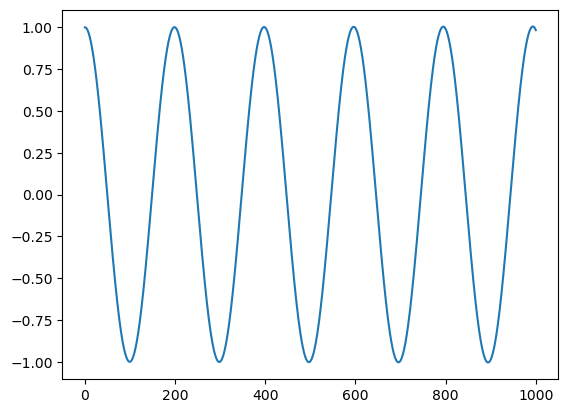

In [24]:
plt.plot(t, x)
plt.show()

In [32]:
# Simulerer nå to partikler som henger sammen

# Startbetingelser
k = 0.001 # Bindingsstyrke (fjærstivhet)
x0_1 = 1
x0_2 = 0
m1 = 1
m2 = 1
v0_1 = 0
v0_2 = 0
x_eq = 0

# Tidsparametre
t0 = 0
tid_slutt = 1000
dt = 1E-2
N = int((tid_slutt - t0)/dt) + 1

# Arrayer
t = np.zeros(N)
v1 = np.zeros(N)
x1 = np.zeros(N)
v2 = np.zeros(N)
x2 = np.zeros(N)

# Initialisering av arrayer
t[0] = t0
v1[0] = v0_1
x1[0] = x0_1
v2[0] = v0_2
x2[0] = x0_2

# Integrasjonsløkke 
for i in range(N-1):
    F = -k*((x1[i] - x2[i]) - x_eq) # Hookes lov
    a1 = F/m1
    a2 = -F/m2
    # Euler-Cromers metode
    v1[i+1] = v1[i] + a1*dt
    v2[i+1] = v2[i] + a2*dt
    x1[i+1] = x1[i] + v1[i+1]*dt
    # Oppdaterer tidssteget
    t[i+1] = t[i] + dt

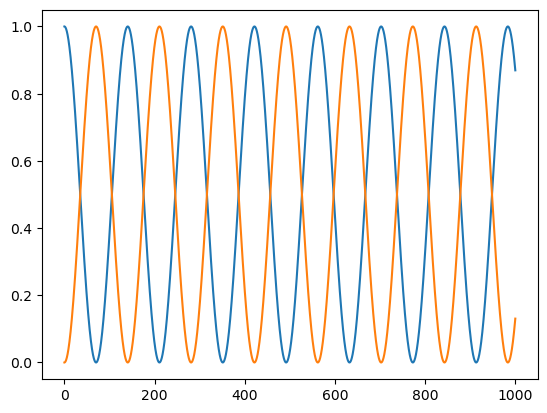

In [33]:
plt.plot(t, x1)
plt.plot(t, x2)
plt.show()

## Bruk av numeriske biblioteker

In [34]:
from scipy.optimize import root_scalar

In [36]:
def f(x):
    return x**3

def dfdx(x):
    return 3*x**2

nullpunkt_halveringsmetoden = root_scalar(f, method = "bisect", bracket = [0,5])
nullpunkt_newtons = root_scalar(f, method = "newton", x0 = 10, fprime = dfdx)
nullpunkt_newtons

      converged: True
           flag: converged
 function_calls: 98
     iterations: 49
           root: 2.3524928182259372e-08
         method: newton

In [67]:
#!pip install --upgrade findiff
from scipy.misc import derivative

def f(x): 
    return x**3 + x**2

print(derivative(f, 1.0, dx=1e-6))

4.999999999921734


/var/folders/z_/zd2_19g1205dvcvdhgk10p680000gp/T/ipykernel_5487/643442001.py:7: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  print(derivative(f, 1.0, dx=1e-6))


In [74]:
# Alternativ måte, siden scipy.misc.derivative skal fjernes i framtida
#!pip install numdifftools
import numdifftools as nd

fd = nd.Derivative(f) # Lager en ny funksjon for den deriverte
fd(1) # Finner den deriverte f'(1)

array(5.)

## Bruk av symbolske biblioteker

In [38]:
from sympy import *

In [43]:
x = symbols("x")
y = x**2 - 4

In [44]:
solve(y)

[-2, 2]

In [47]:
diff(x**2 - log(x**2 - 2))

2*x - 2*x/(x**2 - 2)

In [48]:
integrate(y)

x**3/3 - 4*x

In [56]:
integrate(cos(x**2), (x, -oo, oo))

sqrt(2)*sqrt(pi)/2

In [62]:
limit(cos(x)/x, x, 0)

oo